# 사전 지식

앞선 문제에서는 대칭형 NACA 익형에 대해서만 다루었지만, 그렇지 않은 NACA 익형도 있습니다. "cambered", 또는 휘어진 NACA 익형은 대칭 익형과 비슷한 방식으로 생성되지만, 두께를 측정하는 기준선이 직선이 아니라는 차이점이 있습니다. 휘어진 NACA 익형의 기준선은 다음의 식을 따릅니다. 

$$
y_c = \begin{cases}
 \dfrac{m}{p^2} \left(2px - x^2\right), & (0 \leq x \leq p) \\
 \dfrac{m}{(1 - p)^2} \left( (1 - 2p) + 2px - x^2\right), & (p \leq x \leq 1)
\end{cases}
$$

이때
- $m$은 휘어진 정도를 나타내며, 이는 코드의 천의 자리 숫자를 100으로 나눈 값과 같고,
- $p$는 최고점의 위치를 나타내며, 이는 코드의 백의 자리 숫자를 10으로 나눈 값과 같으며,
- 나머지 변수들은 문제 1번에서 주어진 것과 같습니다.

에어포일의 두께는 기준선에 수직으로 계산되어야 하므로, 추가적인 작업들이 필요할 것입니다. 하지만 너무 어렵게 생각할 필요는 없습니다.

# 문제

다음과 같이 동작하는 함수 `naca_cambered_generator`을 작성하시오:

- 입력: 네 자리의 자연수를 표현하는 문자열 `xxxx`, 받음각을 나타내는 자연수 `theta`
- 출력: `NACA00xx` 익형을 표현하는 샘플 포인트들의 x좌표를 담은 ndarray `x_coord`, y좌표를 담은 ndarray `y_coord`.

**추가 문제** 익형의 받음각을 조절할 수 있도록 해 보세요. 주어진 익형을 `theta`만큼 회전시키면 됩니다.

작성이 완료되면 셀을 실행한 뒤, 아래에 있는 모범답안과 동일하게 표시되는지를 확인하시오. 추가 문제를 해결하지 않았다면 같은 모양의 익형이 세 번씩 표시될 것이며, 이는 각각 모범 답안의 첫 번째와 네 번째 익형과 같아야 합니다. 이전 문제의 코드를 재활용하는 것이 도움이 될 수도 있습니다.

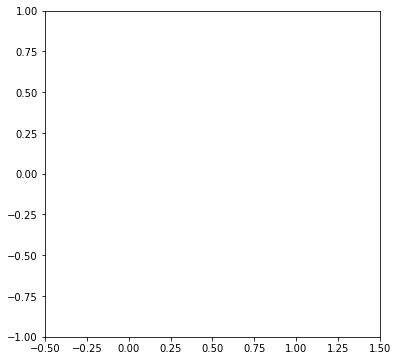

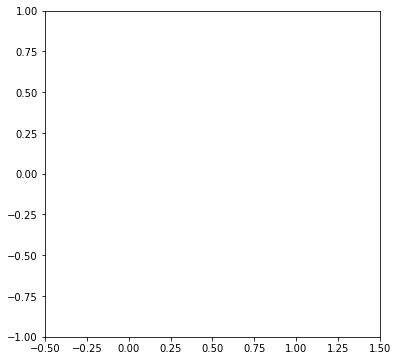

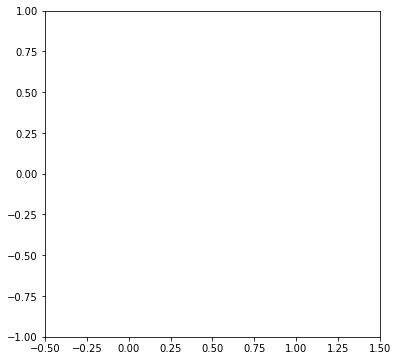

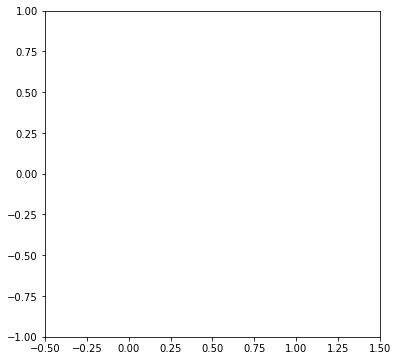

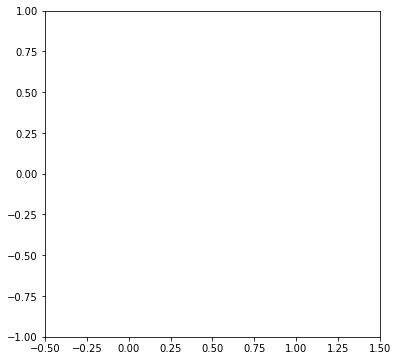

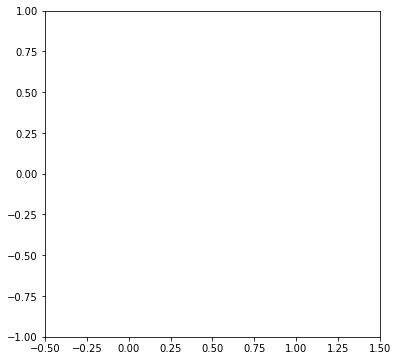

In [10]:
# 필요한 패키지들을 임포트하세요
import matplotlib.pyplot as plt


# 여기에 코드를 작성하세요
def naca_cambered_generator(naca_code, theta):
    return [], []


########################################
# 그래프를 그리는 코드 - 수정하지 마세요
def main():
    codes, aoa = ["2412", "4312"], [0, 15, 30]

    for naca_code in codes:
        for theta in aoa:
            x_coord, y_coord = naca_cambered_generator(naca_code, theta)
            
            plt.figure(figsize=(6, 6))
            plt.plot(x_coord, y_coord)

            ax = plt.gca()
            ax.set_xlim([-0.5, 1.5])
            ax.set_ylim([-1, 1])
            
            plt.show()

main()

# 힌트

1. 이전 문제를 해결할 수 있다면 이번 문제를 해결하는 데도 큰 문제는 없을 것입니다. 하지만 기준선을 계산하기 위해서 샘플 포인트를 계산하는 과정을 두 번 거쳐야 한다는 사실이 조금 번거로울 수 있습니다. `np.linspace` 함수를 두 번 사용하고, 필요할 때 이를 연결하는 것은 어떨까요?
2. 두께를 기준선에 수직으로 계산하기 위해서는 도함수를 구하고, 이를 통해 sin과 cos값을 구한 후 이를 두께에 곱하는 과정이 필요할 것입니다. 원소별 곱셈 원소를 잘 활용하면 이를 간단히 수행할 수 있습니다.
3. 추가 문제는 사실 아주 간단합니다. [회전행렬](https://ko.wikipedia.org/wiki/%ED%9A%8C%EC%A0%84%EB%B3%80%ED%99%98%ED%96%89%EB%A0%AC)을 사용해 보세요. 링크된 페이지에 있는 행렬을 그대로 사용하면 모범 답안에서 주어진 것과는 반대로 회전된 것을 볼 수 있습니다. 사실 받음각은 반대 방향으로의 회전을 의미하는데, 그 이유는 날개는 아래로 향하는 힘이 아닌 위로 향하는 힘을 발생시켜야 하기 때문입니다.

# 모범 답안

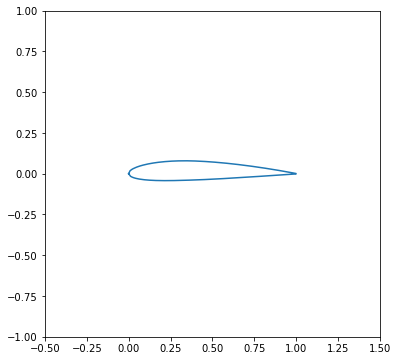

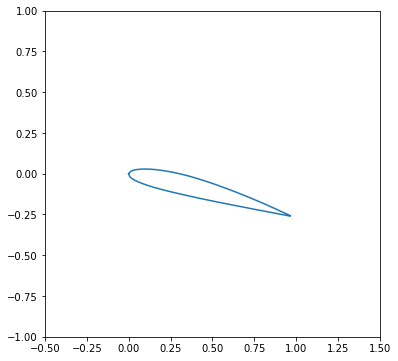

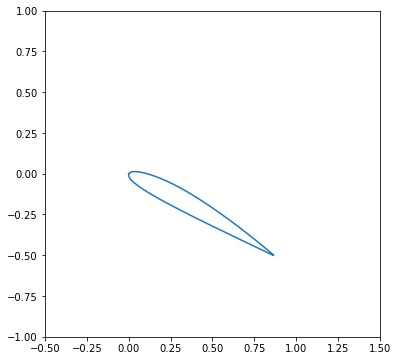

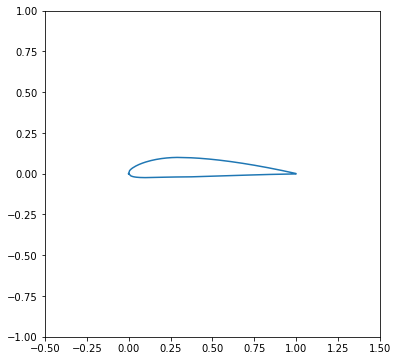

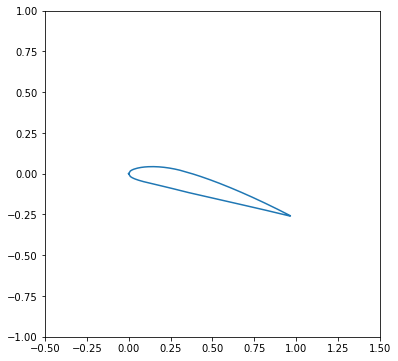

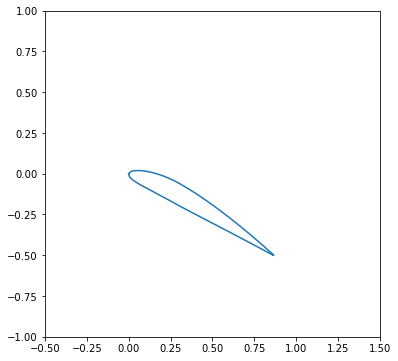

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def naca_cambered_generator(naca_code, theta):
    t = int(naca_code[2:4]) / 100
    p = int(naca_code[1:2]) / 10
    m = int(naca_code[0:1]) / 100

    x_front = np.arange(0, p, 0.01)
    x_rear = np.arange(p, 1.001, 0.01)
    x = np.hstack((x_front, x_rear))
    thickness = 5 * t * (
        0.2969 * x ** 0.5
        - 0.1260 * x
        - 0.3516 * x ** 2
        + 0.2843 * x ** 3
        - 0.1015 * x ** 4
    )

    y_front = m / p ** 2 * (2 * p * x_front - x_front ** 2)
    y_rear = m / (1 - p) ** 2 * (1 - 2 * p + 2 * p * x_rear - x_rear ** 2)
    y = np.hstack((y_front, y_rear))

    deriv_front = 2 * m / p ** 2 * (p - x_front)
    deriv_rear = 2 * m - (1 - p) ** 2 * (p - x_rear)
    angle = np.arctan(np.hstack((deriv_front, deriv_rear)))

    x_upper = x - thickness * np.sin(angle)
    x_lower = x + thickness * np.sin(angle)
    y_upper = y + thickness * np.cos(angle)
    y_lower = y - thickness * np.cos(angle)


    x_coord = np.hstack((x_upper, x_lower[::-1]))
    y_coord = np.hstack((y_upper, y_lower[::-1]))


    rot = [
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ]
    rotated = rot @ np.vstack((x_coord, y_coord))
    return rotated[0], rotated[1]


def main():
    codes, aoa = ["2412", "4312"], [0, np.pi / 12, np.pi / 6]

    for naca_code in codes:
        for theta in aoa:
            x_coord, y_coord = naca_cambered_generator(naca_code, theta)
            
            plt.figure(figsize=(6, 6))
            plt.plot(x_coord, y_coord)

            ax = plt.gca()
            ax.set_xlim([-0.5, 1.5])
            ax.set_ylim([-1, 1])
            
            plt.show()

main()